In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import re
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

driver = webdriver.Chrome()
driver.get('https://finance.naver.com/item/coinfo.naver?code=035420')

driver.switch_to.frame('coinfo_cp')

html = driver.page_source
soup =BeautifulSoup(html,'html.parser')
tbody_tag = soup.find_all('tbody')
print(tbody_tag)

[<tbody><tr class="cmp-table-row">
<td class="cmp-table-cell td0101">
<dl>
<dt>
<span class="name">NAVER</span>
<a class="cEm" href="http://www.navercorp.com" target="comPage" title="[홈페이지] www.navercorp.com"><img align="absmiddle" hspace="3" src="/images/icon_home.gif"/></a>
[주식담당] 1588-3830"><img align="absmiddle" hspace="1" src="/images/icon_tel.gif"/></a>
<b class="num">035420</b>
</dt>
<dt class="line-left">NAVER</dt>
<dt class="line-left">KOSPI : 서비스업</dt>
<dt class="line-left">WICS : 양방향미디어와서비스</dt>
</dl>
</td>
</tr>
<tr class="cmp-table-row">
<td class="cmp-table-cell td0201">
<div> </div>
</td>
</tr>
<tr class="cmp-table-row">
<td class="cmp-table-cell td0301">
<dl>
<dt>EPS <b class="num">8,983</b></dt>
<dt class="line-left">BPS <b class="num">155,231</b></dt>
<dt class="line-left">PER <b class="num">17.51</b></dt>
<dt class="line-left">업종PER <b class="num">108.08</b></dt>
<dt class="line-left">PBR <b class="num">1.01</b></dt>
<dt class="line-left">현금배당수익률 <b class="num">0.77%

In [2]:
text_data = tbody_tag[17].text
text_data

'\n2021(A)\n68,176\n28.53\n13,255\n164,898\n100,400\n3.77\n2.40\n106.72\n35.60\n2.20\nIFRS연결\n2022(A)\n82,201\n20.57\n13,047\n7,603\n4,634\n38.30\n1.17\n3.29\n15.75\n1.14\nIFRS연결\n2023(A)\n96,706\n17.65\n14,888\n10,123\n6,180\n36.25\n1.45\n4.41\n17.47\n-0.82\nIFRS연결\n2024(E)\n105,797\n9.40\n18,879\n15,867\n9,809\n16.04\n0.95\n6.62\n9.29\n-7.99\nIFRS연결\n2025(E)\n115,612\n9.28\n21,255\n16,241\n10,101\n15.57\n0.90\n6.40\n7.69\n-11.84\nIFRS연결\n\n'

In [3]:
item_list = []
remove_span = re.split(r'\n|\n', text_data)
for word in remove_span:
    if word !='':
        item_list.append(word)

In [4]:
import pandas as pd
item_list

['2021(A)',
 '68,176',
 '28.53',
 '13,255',
 '164,898',
 '100,400',
 '3.77',
 '2.40',
 '106.72',
 '35.60',
 '2.20',
 'IFRS연결',
 '2022(A)',
 '82,201',
 '20.57',
 '13,047',
 '7,603',
 '4,634',
 '38.30',
 '1.17',
 '3.29',
 '15.75',
 '1.14',
 'IFRS연결',
 '2023(A)',
 '96,706',
 '17.65',
 '14,888',
 '10,123',
 '6,180',
 '36.25',
 '1.45',
 '4.41',
 '17.47',
 '-0.82',
 'IFRS연결',
 '2024(E)',
 '105,797',
 '9.40',
 '18,879',
 '15,867',
 '9,809',
 '16.04',
 '0.95',
 '6.62',
 '9.29',
 '-7.99',
 'IFRS연결',
 '2025(E)',
 '115,612',
 '9.28',
 '21,255',
 '16,241',
 '10,101',
 '15.57',
 '0.90',
 '6.40',
 '7.69',
 '-11.84',
 'IFRS연결']

In [5]:
# value_dict 만들기
value_dict = {'영업이익':[item_list[3],item_list[15],item_list[27]],
              'PER':[item_list[6],item_list[18],item_list[30]],
              'PBR':[item_list[7],item_list[19],item_list[31]],
              'ROE':[item_list[8],item_list[20],item_list[32]]}

In [6]:
print(value_dict)
value_DF=pd.DataFrame(value_dict,index=['2021','2022','2023'])
value_DF

{'영업이익': ['13,255', '13,047', '14,888'], 'PER': ['3.77', '38.30', '36.25'], 'PBR': ['2.40', '1.17', '1.45'], 'ROE': ['106.72', '3.29', '4.41']}


,영업이익,PER,PBR,ROE
2021,"13,255",3.77,2.40,106.72
2022,"13,047",38.30,1.17,3.29
2023,"14,888",36.25,1.45,4.41


In [7]:
value_DF['영업이익']=value_DF['영업이익'].replace(',', '', regex=True).astype(int)
value_DF['PER']=value_DF['PER'].astype(float)
value_DF['PBR']=value_DF['PBR'].astype(float)
value_DF['ROE']=value_DF['ROE'].astype(float)

In [8]:
value_DF

,영업이익,PER,PBR,ROE
2021,13255,3.77,2.40,106.72
2022,13047,38.30,1.17,3.29
2023,14888,36.25,1.45,4.41


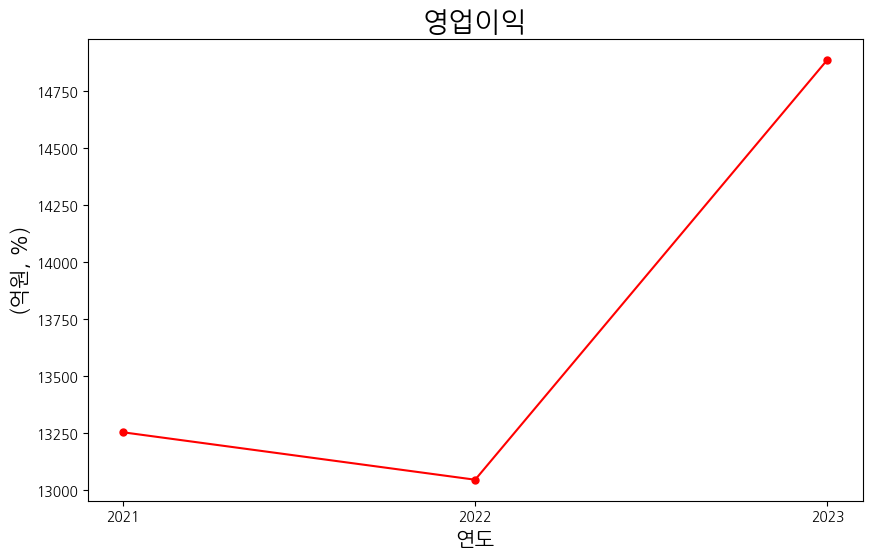

In [13]:
# 영업이익 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(value_DF['영업이익'],marker='o',ms=5,color='r')
plt.ylabel('(억원, %)',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.title('영업이익',fontsize=20)
plt.show()


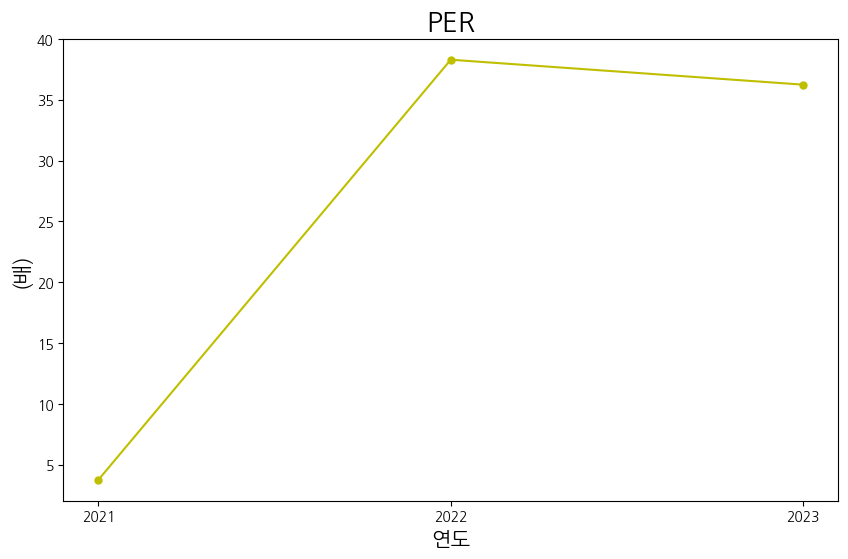

In [14]:
# PER 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(value_DF['PER'],marker='o',ms=5,color='y')
plt.ylabel('(배)',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.title('PER',fontsize=20)
plt.show()

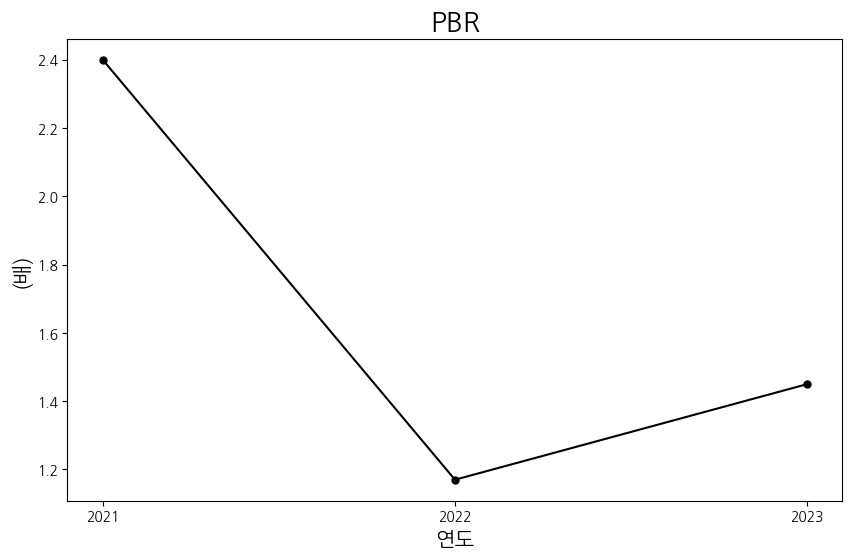

In [16]:
# PBR 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(value_DF['PBR'],marker='o',ms=5,color='k')
plt.ylabel('(배)',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.title('PBR',fontsize=20)
plt.show()

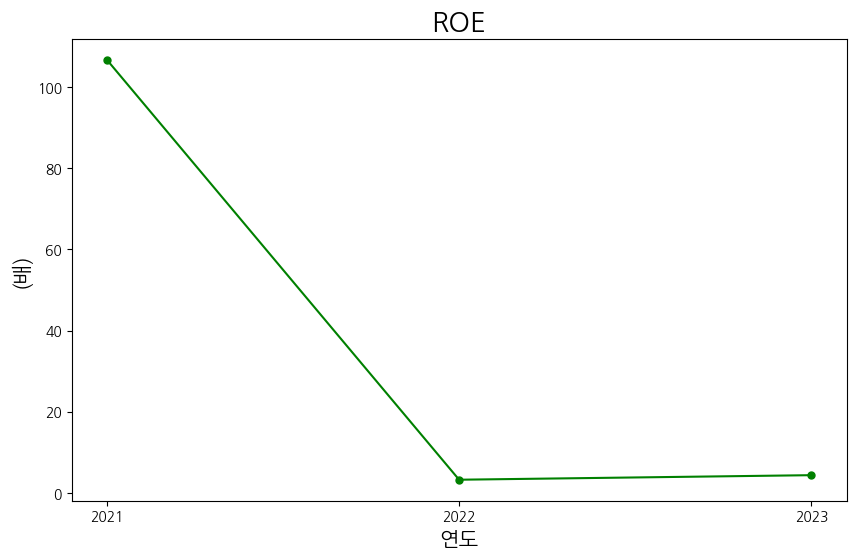

In [12]:
#ROE 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(value_DF['ROE'],marker='o',ms=5,color='g')
plt.ylabel('(배)',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.title('ROE',fontsize=20)
plt.show()